In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd
import datetime as dt
import pandas_ta
import warnings
warnings.filterwarnings('error')

# Data import

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [3]:
df['Symbol'] = df['Symbol'].str.replace('.', '-')

comp_list = df['Symbol'].unique().tolist()
comp_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [11]:
end_date = '2024-01-01'
start_date = pd.to_datetime(end_date) - pd.Timedelta(365*4, 'days')
print(start_date)

df = yf.download(tickers=comp_list, start=start_date, end=end_date)
df

2020-01-02 00:00:00


[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
['SW', 'GEV', 'AMTM', 'SOLV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-02 00:00:00 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577941200, endDate = 1704085200")')


Price                       Adj Close                                      \
Ticker                              A        AAPL        ABBV        ABNB   
Date                                                                        
2020-01-02 00:00:00+00:00   84.799675   74.207466   80.137360         NaN   
2020-01-03 00:00:00+00:00   83.438141   73.486023   79.376686         NaN   
2020-01-06 00:00:00+00:00   83.684799   74.071579   80.003105         NaN   
2020-01-07 00:00:00+00:00   83.941315   73.723213   79.546715         NaN   
2020-01-08 00:00:00+00:00   84.770073   74.909149   80.110481         NaN   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00+00:00  139.570007  193.600006  154.940002  140.800003   
2023-12-26 00:00:00+00:00  139.809998  193.050003  154.619995  138.720001   
2023-12-27 00:00:00+00:00  139.820007  193.149994  154.880005  136.550003   
2023-12-28 00:00:00+00:00  139.770004  193.580002  154.750000  137.000000   
2023-12-29 00:00:00+00:00  139.029999  192.529999  154.970001  136.139999   

Price                                                                     \
Ticker                            ABT       ACGL         ACN        ADBE   
Date                                                                       
2020-01-02 00:00:00+00:00   84.001160  43.400002  203.776108  334.429993   
2020-01-03 00:00:00+00:00   82.977119  43.349998  203.436722  331.809998   
2020-01-06 00:00:00+00:00   83.411850  43.520000  202.108276  333.709991   
2020-01-07 00:00:00+00:00   82.948128  43.160000  197.744766  333.390015   
2020-01-08 00:00:00+00:00   83.286255  42.730000  198.132614  337.869995   
...                               ...        ...         ...         ...   
2023-12-22 00:00:00+00:00  109.029999  73.839996  354.450012  598.750000   
2023-12-26 00:00:00+00:00  109.230003  73.510002  353.429993  598.260010   
2023-12-27 00:00:00+00:00  109.790001  73.540001  353.820007  596.080017   
2023-12-28 00:00:00+00:00  110.400002  74.059998  351.589996  595.520020   
2023-12-29 00:00:00+00:00  110.070000  74.269997  350.910004  596.599976   

Price                                             ...  Volume           \
Ticker                            ADI        ADM  ...     WTW       WY   
Date                                              ...                    
2020-01-02 00:00:00+00:00  116.998917  43.316341  ...  465800  4973500   
2020-01-03 00:00:00+00:00  114.939316  43.231792  ...  411400  3111000   
2020-01-06 00:00:00+00:00  113.588921  42.893604  ...  620200  2178600   
2020-01-07 00:00:00+00:00  116.173134  42.376923  ...  443200  2426200   
2020-01-08 00:00:00+00:00  117.222366  41.907219  ...  486400  2299800   
...                               ...        ...  ...     ...      ...   
2023-12-22 00:00:00+00:00  197.100006  71.459999  ...  328600  2253500   
2023-12-26 00:00:00+00:00  198.869995  72.389999  ...  296900  2542300   
2023-12-27 00:00:00+00:00  199.350006  72.169998  ...  323300  2109200   
2023-12-28 00:00:00+00:00  200.240005  72.269997  ...  265200  2586100   
2023-12-29 00:00:00+00:00  198.559998  72.220001  ...  336900  3079100   

Price                                                                    \
Ticker                        WYNN      XEL       XOM      XYL      YUM   
Date                                                                      
2020-01-02 00:00:00+00:00  3006500  2915400  12456400   869500  1369900   
2020-01-03 00:00:00+00:00  1760500  2422500  17386900   795100  1145500   
2020-01-06 00:00:00+00:00  1357900  2217100  20081900   817300  1454100   
2020-01-07 00:00:00+00:00  1722100  1861100  17387700   662200  1388600   
2020-01-08 00:00:00+00:00  1176200  4828900  15137700  1083200  1521500   
...                            ...      ...       ...      ...      ...   
2023-12-22 00:00:00+00:00  1170500  2429300  12921800   829300   991500   
2023-12-26 00:00:00+00:00  1150000  2147500  16835100   440300   6275

In [14]:
df = df.stack(future_stack=True)

df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()

df

Price                              adj close       close        high  \
date                      ticker                                       
2020-01-02 00:00:00+00:00 A        84.799675   85.949997   86.349998   
                          AAPL     74.207466   75.087502   75.150002   
                          ABBV     80.137360   89.550003   89.570000   
                          ABNB           NaN         NaN         NaN   
                          ABT      84.001160   86.949997   86.959999   
...                                      ...         ...         ...   
2023-12-29 00:00:00+00:00 XYL     114.360001  114.360001  114.680000   
                          YUM     130.660004  130.660004  131.250000   
                          ZBH     121.699997  121.699997  122.400002   
                          ZBRA    273.329987  273.329987  276.309998   
                          ZTS     197.369995  197.369995  198.009995   

Price                                    low        open       volume  
date                      ticker                                       
2020-01-02 00:00:00+00:00 A        85.199997   85.900002    1410500.0  
                          AAPL     73.797501   74.059998  135480400.0  
                          ABBV     88.510002   89.080002    5639200.0  
                          ABNB           NaN         NaN          NaN  
                          ABT      85.800003   86.059998    4969000.0  
...                                      ...         ...          ...  
2023-12-29 00:00:00+00:00 XYL     113.930000  114.089996     698900.0  
                          YUM     130.210007  130.410004    1196800.0  
                          ZBH     121.239998  121.459999     849600.0  
                          ZBRA    272.769989  274.730011     251300.0  
                          ZTS     196.250000  196.679993    1007200.0  

[506018 rows x 6 columns]

In [15]:
df['garman_klass_vol'] = (np.log(df['high']) - np.log(df['low']))**2 / 2 - (2 * np.log(2) - 1) * (np.log(df['adj close']) - np.log(df['open']))**2
df

Price                              adj close       close        high  \
date                      ticker                                       
2020-01-02 00:00:00+00:00 A        84.799675   85.949997   86.349998   
                          AAPL     74.207466   75.087502   75.150002   
                          ABBV     80.137360   89.550003   89.570000   
                          ABNB           NaN         NaN         NaN   
                          ABT      84.001160   86.949997   86.959999   
...                                      ...         ...         ...   
2023-12-29 00:00:00+00:00 XYL     114.360001  114.360001  114.680000   
                          YUM     130.660004  130.660004  131.250000   
                          ZBH     121.699997  121.699997  122.400002   
                          ZBRA    273.329987  273.329987  276.309998   
                          ZTS     197.369995  197.369995  198.009995   

Price                                    low        open       volume  \
date                      ticker                                        
2020-01-02 00:00:00+00:00 A        85.199997   85.900002    1410500.0   
                          AAPL     73.797501   74.059998  135480400.0   
                          ABBV     88.510002   89.080002    5639200.0   
                          ABNB           NaN         NaN          NaN   
                          ABT      85.800003   86.059998    4969000.0   
...                                      ...         ...          ...   
2023-12-29 00:00:00+00:00 XYL     113.930000  114.089996     698900.0   
                          YUM     130.210007  130.410004    1196800.0   
                          ZBH     121.239998  121.459999     849600.0   
                          ZBRA    272.769989  274.730011     251300.0   
                          ZTS     196.250000  196.679993    1007200.0   

Price                             garman_klass_vol  
date                      ticker                    
2020-01-02 00:00:00+00:00 A               0.000026  
                          AAPL            0.000163  
                          ABBV           -0.004253  
                          ABNB                 NaN  
                          ABT            -0.000136  
...                                            ...  
2023-12-29 00:00:00+00:00 XYL             0.000019  
                          YUM             0.000030  
                          ZBH             0.000044  
                          ZBRA            0.000073  
                          ZTS             0.000035  

[506018 rows x 7 columns]

In [16]:
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
df

Price                              adj close       close        high  \
date                      ticker                                       
2020-01-02 00:00:00+00:00 A        84.799675   85.949997   86.349998   
                          AAPL     74.207466   75.087502   75.150002   
                          ABBV     80.137360   89.550003   89.570000   
                          ABNB           NaN         NaN         NaN   
                          ABT      84.001160   86.949997   86.959999   
...                                      ...         ...         ...   
2023-12-29 00:00:00+00:00 XYL     114.360001  114.360001  114.680000   
                          YUM     130.660004  130.660004  131.250000   
                          ZBH     121.699997  121.699997  122.400002   
                          ZBRA    273.329987  273.329987  276.309998   
                          ZTS     197.369995  197.369995  198.009995   

Price                                    low        open       volume  \
date                      ticker                                        
2020-01-02 00:00:00+00:00 A        85.199997   85.900002    1410500.0   
                          AAPL     73.797501   74.059998  135480400.0   
                          ABBV     88.510002   89.080002    5639200.0   
                          ABNB           NaN         NaN          NaN   
                          ABT      85.800003   86.059998    4969000.0   
...                                      ...         ...          ...   
2023-12-29 00:00:00+00:00 XYL     113.930000  114.089996     698900.0   
                          YUM     130.210007  130.410004    1196800.0   
                          ZBH     121.239998  121.459999     849600.0   
                          ZBRA    272.769989  274.730011     251300.0   
                          ZTS     196.250000  196.679993    1007200.0   

Price                             garman_klass_vol        rsi  
date                      ticker                               
2020-01-02 00:00:00+00:00 A               0.000026        NaN  
                          AAPL            0.000163        NaN  
                          ABBV           -0.004253        NaN  
                          ABNB                 NaN        NaN  
                          ABT            -0.000136        NaN  
...                                            ...        ...  
2023-12-29 00:00:00+00:00 XYL             0.000019  75.492358  
                          YUM             0.000030  58.710389  
                          ZBH             0.000044  68.324469  
                          ZBRA            0.000073  67.914673  
                          ZTS             0.000035  66.737233  

[506018 rows x 8 columns]

<Axes: xlabel='date'>

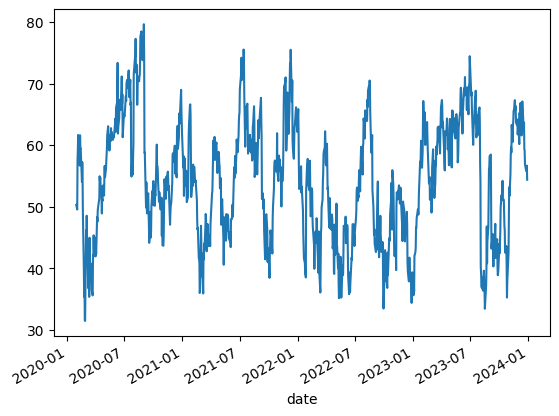

In [17]:
df.xs('AAPL', level=1)['rsi'].plot()